In [1]:

    
import sys
import os
import scipy
import math
import random
import numpy
import string
from sklearn import datasets
import subprocess
import pandas as pd
import string
import pydotplus 
import pydot
import graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import matplotlib.cm as cm # 
from skimage.color import rgb2gray
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from scipy.misc import imread
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
#from scipy import misc
from sklearn.model_selection import GridSearchCV
from pylab import *
#from skimage import img_as_float
from PIL import Image
import PIL.Image
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import random
import json
   

C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
n=46
z=100
z1=200
prod=z*z1
data = np.zeros((z1,z))
for s in range(0,n+1):   #last sample plus 1
    im =Image.open("draw/%d.png"%s)
    im = im.resize((z, z1), Image.ANTIALIAS)
    im = im.convert('RGB')
    
    im=numpy.array(im)
    
    grayscale = numpy.zeros((z,z1))
  
    grayscale = np.dot(im, [ 0.2989,  0.5870, 0.1140])   
    grayscale = (grayscale - np.mean(grayscale))/np.std(grayscale)   #standardiz
    data = np.dstack((data,grayscale))
    

y = [0,1,1,1,1,2,2,2,2,1,2,2,2,3,3,3,4,4,4,4,3,3,3,1,1,1,1,3,2,3,2,3,2,4,4,1,1,2,2,4,4,2,2,3,4,3,2]

# 0 is empty

# 1 is circle

#2 is triangle

#3 heart

#4 is star


y=np.array((y))
data=data[:,:,1:n+2]  #last sample plus 2
data2=reshape(data[:,:,0], prod, 1) #

for i in range(1,n+1):  #last sample plus 1
    data2=np.vstack((data2,reshape(data[:,:,i], prod, 1)))

data3=data2[0:n+2,:]  #last sample plus 2

data3 = (data3 - np.mean(data3))/np.std(data3)   #standardize
print (numpy.mean(data3))
print (numpy.std(data3))

print ("end")
################
#########################################################################
m=4
testdata = np.zeros((z1,z))
for s in range(1,m+1):   #last sample plus 1
    im =Image.open("draw/test%d.jpg"%s)
    im = im.resize((z, z1), Image.ANTIALIAS)
    im = im.convert('RGB')

    cc = np.array(im)
    grayscale = np.dot(cc, [0.2126, 0.7152, 0.0722])  
    grayscale = (grayscale - np.mean(grayscale))/np.std(grayscale)   #standardiz
    testdata = np.dstack((testdata,grayscale))
    

testdata=testdata[:,:,1:m+2]  #last sample plus 2 
testdata2=reshape(testdata[:,:,0], prod, 1)

for i in range(0,m): 
    #print (i)
    testdata2=np.vstack((testdata2,reshape(testdata[:,:,i], prod, 1)))

testdata3=testdata2[1:m+1,:]  #last sample plus 1



testset=testdata3
testset = (testset - np.mean(testset))/np.std(testset)   #standardize
print (numpy.mean(testset))
print (numpy.std(testset))
print (numpy.mean(data3))
print (numpy.std(data3))

-6.047172219234895e-18
1.0
end
-9.947598300641403e-18
1.0
-6.047172219234895e-18
1.0


C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 1}
4
star
2
triangle
3
heart
1
circle


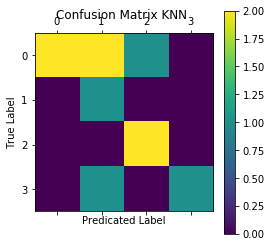

In [3]:
#knn

X = data3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
k_range = list(range(1, 7))
param_grid = dict(n_neighbors=k_range)
                
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')    # find the best k using grid search with cv = 5
grid.fit(X_train,y_train)

print(grid.best_params_)

k = (grid.best_params_['n_neighbors'])
       
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train,y_train)
prediction1 = model.predict(X_test)
prediction = model.predict(testset)
cm = confusion_matrix(y_test, prediction1)

for i in range(0,len(prediction)):
    ss=prediction[i]
    print (ss)
    if ss == 0:
        print('empty')
    
    if ss == 1:
        print('circle')
    
    if ss == 2:
        print('triangle')
    
    if ss == 3:
        print('heart')
        
    if ss == 4:
        print ('star')    
 



fig = plt.figure()
plt.matshow(cm)
plt.title('Confusion Matrix KNN ')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_knn.png')
plt.show()

C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.5405405405405406
{'C': 0.004893900918477494}
[4 2 3 2]
[[0 0 0 0 0]
 [1 0 2 2 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 1 1 0 0]]


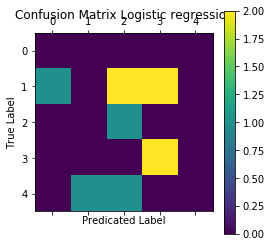

In [4]:
#Logistic Regression
X = data3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




k_range = list(numpy.logspace(-5, 1, 30))
param_grid = dict(C=k_range)
                
clf = LogisticRegression(penalty='l2')
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')    # find the best k using grid search with cv = 5
grid.fit(X_train,y_train)
grid.grid_scores_

print(grid.best_score_)
print(grid.best_params_)

alpha_best = grid.best_params_['C']
clf = LogisticRegression(penalty='l2', C=alpha_best)  # c = 1.0 default
clf.fit(X_train,y_train)
coef=clf.coef_
logisticregression_pred = clf.predict(testset)
print (logisticregression_pred)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print (cm)
fig = plt.figure()
plt.matshow(cm)
plt.title('Confusion Matrix Logistic regression')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()


C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.5675675675675675
{'C': 0.001}
[4 2 3 2]
[[0 0 0 0 0]
 [1 0 2 2 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 1 1 0 0]]


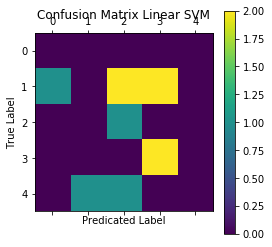

In [5]:
#SVM

X=data3
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR

k_range = list(numpy.logspace(-3, 0, 30))
param_grid = dict(C=k_range)
                
clf = LinearSVC(penalty='l2')
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')    # find the best k using grid search with cv = 5
grid.fit(X_train,y_train)
grid.grid_scores_

print(grid.best_score_)
print(grid.best_params_)



clf = LinearSVC(C=grid.best_params_['C'],random_state=0,penalty='l2')

#print (clf)
clf.fit(X_train,y_train)
r = clf.predict(testset)
print (r)


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print (cm)
fig = plt.figure()
plt.matshow(cm)
plt.title('Confusion Matrix Linear SVM')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_svm.png')
plt.show()

(47, 20000)
(47, 2)


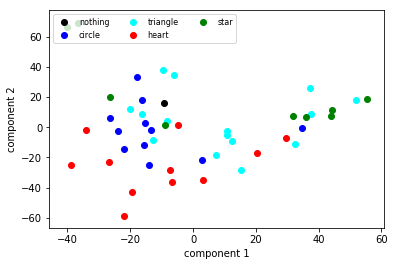

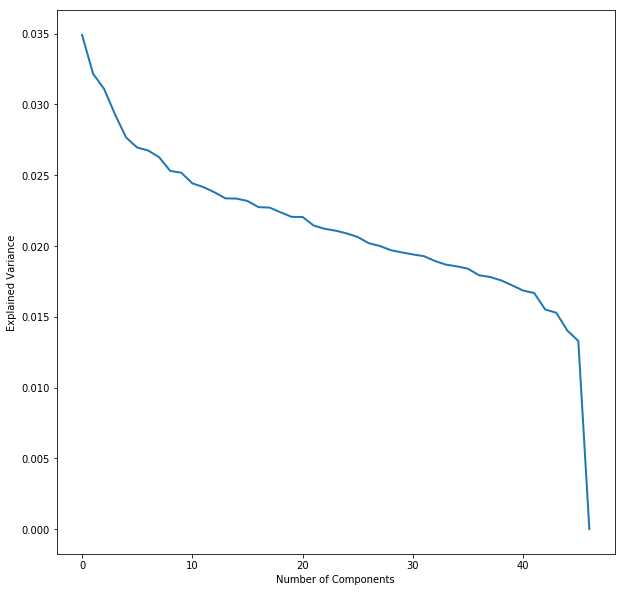

(47, 20000)
22.509790114012667


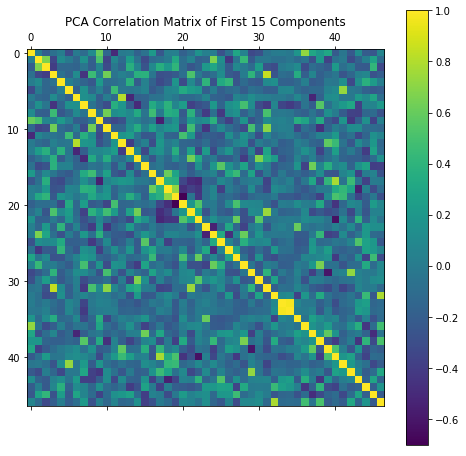

In [6]:
# PCA

X = data3
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print (X.shape)
new=pca.fit(X)
X_pca = pca.transform(X)
print (X_pca.shape)

colors = ['black', 'blue', 'cyan', 'red','green']
for i in range(len(y)):
    if y[i] == 0:
        nothing = plt.scatter(X_pca[i, 0], X_pca[i, 1],c=colors[0])
    if y[i] == 1:
        circle = plt.scatter(X_pca[i, 0], X_pca[i, 1],c=colors[1]) 
    if y[i] == 2:
        triangle= plt.scatter(X_pca[i, 0], X_pca[i, 1],c=colors[2])  
    if y[i] == 3:
        heart = plt.scatter(X_pca[i, 0], X_pca[i, 1],c=colors[3])  
    if y[i] == 4:
        star= plt.scatter(X_pca[i, 0], X_pca[i, 1],c=colors[4])      


plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend((nothing, circle, triangle, heart, star), ('nothing','circle','triangle','heart','star'), scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
#plt.colorbar();
#xlim((-17.5, 1)) 
#ylim((-15, 15)) 
plt.savefig("pca_result.jpg")
plt.show()

# pca versus variance

pca = PCA()


pca.fit(X)

plt.figure(1, figsize=(10, 10))

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig("variance.jpg")
plt.show()

# new PCA

X = data3

pca = PCA(n_components=15)
print (X.shape)
new=pca.fit(X)
X_pca = pca.transform(X)
testset_pca = pca.transform(testset)
print (numpy.std(X_pca))
#correlation matrix after pca 
corr_matrix = numpy.corrcoef(X_pca)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix)
fig.colorbar(cax)
plt.title("PCA Correlation Matrix of First 15 Components")
plt.savefig("correlation_PCA.jpg")
plt.show()

C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Saumya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.5675675675675675
{'C': 0.02807216203941177}
[4 2 2 3]
[[0 1 4 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 2]]


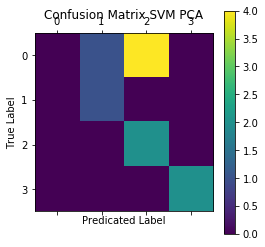

In [7]:
#LINEAR SVC AFTER PCA


X=X_pca
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_range = list(numpy.logspace(-3, 0, 30))
param_grid = dict(C=k_range)
                
clf = LinearSVC(penalty='l2')
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')    # find the best k using grid search with cv = 5
grid.fit(X_train,y_train)
grid.grid_scores_

print(grid.best_score_)
print(grid.best_params_)



clf = LinearSVC(C=grid.best_params_['C'],random_state=0,penalty='l2')
 

#print (clf)
clf.fit(X_train,y_train)
r = clf.predict(testset_pca)
print (r)


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print (cm)
fig = plt.figure()
plt.matshow(cm)
plt.title('Confusion Matrix SVM PCA')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_pca_Svm.png')
plt.show()